In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
pip install wordcloud

     |████████████████████████████████| 160 kB 458 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [7]:
data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [4]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)


#0.1= one by ten values should be in test data
#total rows   = 13871
#one percent  = 1388
#nine percent = 13871-(13871/10)
#             = 12483





In [8]:
train, test = train_test_split(data,test_size = 0.1)

In [9]:
train

,text,sentiment
599,same old tiresome #gop #tcot BS The #Republica...,Negative
6671,"Fifty-fifty% on ""the stupidity of the American...",Positive
6100,RT @TheVGBlog: #GOPDebate: Round Two Recap: W...,Negative
8675,RT @RWSurferGirl: So @megynkelly posed for adu...,Negative
563,"So, it's official; the GOP 2016 Platform is le...",Negative
...,...,...
11844,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
6935,RT @JonScottFNC: Ever think you'd hear about p...,Negative
1874,My only #GOPdebate comment: They're unanimous ...,Negative
6043,RT @NASCARNAC: Funny to see so many calling to...,Negative


In [12]:
test

,text,sentiment
1301,"RT @JonFeere: Fox's @MegynKelly says she's ""sw...",Negative
1104,Bingo #GOPDebate #KochBrothers \n#Puppets Wine...,Negative
10012,RT @goldietaylor: Closing statements! #GOPDeba...,Neutral
4142,RT @KatiePavlich: We're already seeing differe...,Neutral
775,"RT @larryelder: Trump SHOULD have said, ""If th...",Neutral
...,...,...
2410,"John Kasich is the leader America needs, but n...",Positive
13557,I'd rather go swim in my pool with my kids tha...,Negative
6286,Not only are the candidates eating each other....,Negative
9584,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative


In [13]:
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [14]:
train

,text,sentiment
599,same old tiresome #gop #tcot BS The #Republica...,Negative
6671,"Fifty-fifty% on ""the stupidity of the American...",Positive
6100,RT @TheVGBlog: #GOPDebate: Round Two Recap: W...,Negative
8675,RT @RWSurferGirl: So @megynkelly posed for adu...,Negative
563,"So, it's official; the GOP 2016 Platform is le...",Negative
...,...,...
12892,#GOPDebates Trump sidestepping his 4 corporate...,Negative
11844,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
6935,RT @JonScottFNC: Ever think you'd hear about p...,Negative
1874,My only #GOPdebate comment: They're unanimous ...,Negative


In [15]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']


In [16]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos

,text,sentiment
6671,"Fifty-fifty% on ""the stupidity of the American...",Positive
9312,@Slate #GOPDebates Our president should be les...,Positive
11329,RT @SalMasekela: Is Kasich aware that he's mak...,Positive
10202,Rubio is American Dream story. #GOPDebates,Positive
6113,RT @JohnKasich: Giving a free #Kasich4Us hat a...,Positive
...,...,...
5000,#RFS reduces our need for oil imports from hos...,Positive
10761,RT @marymauldin: Hey @FoxNews ! How absolutely...,Positive
3438,#GOPDebate moderated by @foxnews was our chanc...,Positive
7173,RT @alexandergold: Kim Kardashian and Kanye We...,Positive


In [17]:
train_pos = train_pos['text']
train_pos

6671     Fifty-fifty% on "the stupidity of the American...
9312     @Slate #GOPDebates Our president should be les...
11329    RT @SalMasekela: Is Kasich aware that he's mak...
10202           Rubio is American Dream story. #GOPDebates
6113     RT @JohnKasich: Giving a free #Kasich4Us hat a...
                               ...                        
5000     #RFS reduces our need for oil imports from hos...
10761    RT @marymauldin: Hey @FoxNews ! How absolutely...
3438     #GOPDebate moderated by @foxnews was our chanc...
7173     RT @alexandergold: Kim Kardashian and Kanye We...
5195     RT @YaakovSchapiro: My #GOPDebate analysis, 9)...
Name: text, Length: 2017, dtype: object

In [18]:
train_neg = train[ train['sentiment'] == 'Negative']
train_neg

,text,sentiment
599,same old tiresome #gop #tcot BS The #Republica...,Negative
6100,RT @TheVGBlog: #GOPDebate: Round Two Recap: W...,Negative
8675,RT @RWSurferGirl: So @megynkelly posed for adu...,Negative
563,"So, it's official; the GOP 2016 Platform is le...",Negative
11971,"""You guys are fucking mean to each other, let'...",Negative
...,...,...
12892,#GOPDebates Trump sidestepping his 4 corporate...,Negative
11844,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
6935,RT @JonScottFNC: Ever think you'd hear about p...,Negative
1874,My only #GOPdebate comment: They're unanimous ...,Negative


In [19]:
train_neg = train_neg['text']
train_neg

599      same old tiresome #gop #tcot BS The #Republica...
6100     RT @TheVGBlog: #GOPDebate:  Round Two Recap: W...
8675     RT @RWSurferGirl: So @megynkelly posed for adu...
563      So, it's official; the GOP 2016 Platform is le...
11971    "You guys are fucking mean to each other, let'...
                               ...                        
12892    #GOPDebates Trump sidestepping his 4 corporate...
11844    RT @RWSurferGirl: Jeb Bush reminds me of eleva...
6935     RT @JonScottFNC: Ever think you'd hear about p...
1874     My only #GOPdebate comment: They're unanimous ...
6043     RT @NASCARNAC: Funny to see so many calling to...
Name: text, Length: 7636, dtype: object

In [48]:
train_neg[0:0]

Series([], Name: text, dtype: object)

In [58]:
    words = ' '.join(train_neg)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])

In [64]:
train

,text,sentiment
599,same old tiresome #gop #tcot BS The #Republica...,Negative
6671,"Fifty-fifty% on ""the stupidity of the American...",Positive
6100,RT @TheVGBlog: #GOPDebate: Round Two Recap: W...,Negative
8675,RT @RWSurferGirl: So @megynkelly posed for adu...,Negative
563,"So, it's official; the GOP 2016 Platform is le...",Negative
...,...,...
12892,#GOPDebates Trump sidestepping his 4 corporate...,Negative
11844,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
6935,RT @JonScottFNC: Ever think you'd hear about p...,Negative
1874,My only #GOPdebate comment: They're unanimous ...,Negative


In [66]:
train=train['text']
train

599      same old tiresome #gop #tcot BS The #Republica...
6671     Fifty-fifty% on "the stupidity of the American...
6100     RT @TheVGBlog: #GOPDebate:  Round Two Recap: W...
8675     RT @RWSurferGirl: So @megynkelly posed for adu...
563      So, it's official; the GOP 2016 Platform is le...
                               ...                        
12892    #GOPDebates Trump sidestepping his 4 corporate...
11844    RT @RWSurferGirl: Jeb Bush reminds me of eleva...
6935     RT @JonScottFNC: Ever think you'd hear about p...
1874     My only #GOPdebate comment: They're unanimous ...
6043     RT @NASCARNAC: Funny to see so many calling to...
Name: text, Length: 9653, dtype: object

In [65]:
len(train)

9653

In [ ]:
for i in range(len(train)):
    l.append()

In [59]:
cleaned_word

'same old tiresome BS The Debate: There He Blows // Round Two Recap: We knew there was going to be fireworks. And we got them with no big surprises ... So posed for adult pictures.should we bring that up? So, it\'s official; the GOP 2016 Platform is less abortion, more war. That\'s it. That\'s what they are after. "You guys are fucking mean to each other, let\'s talk about it!" or All Ted Cruz does is attack other Republicans. The in cartoons "God loves you and he needs money" George Carlin &amp; Ben Carson "The purpose of the military is to kill people and break things." Oh it is? I thought it was about protecting a nation\'… Disappointed that didn\'t talk about his called, F**k Your Hair? Can\'t Believe the comments trashing \'s hair style when is on stage of all people Is "I know someone who decided against abortion" the new "I have black friends"? at the first Some politicians are so obsessed w protecting rights of fetuses but care nothing about rights of ppl who are alive, struggl

In [60]:
words

'same old tiresome #gop #tcot BS The #Republican Debate: There He Blows http://t.co/Sff0jUexUx #gopdebate // #Sanders2016 RT @TheVGBlog: #GOPDebate:  Round Two Recap: We knew there was going to be fireworks.  And we got them with no big surprises ... http://t.c… RT @RWSurferGirl: So @megynkelly posed for adult pictures.should we bring that up? #GOPDebate  #GOPDebates So, it\'s official; the GOP 2016 Platform is less abortion, more war. That\'s it. That\'s what they are after. #GOPDebate #Priorities "You guys are fucking mean to each other, let\'s talk about it!" #GOPDebates or #MeanGirls? RT @kesgardner: All Ted Cruz does is attack other Republicans. #GOPDebate RT @JamalDajani: The #GOPDebate in cartoons https://t.co/PKulN2wzbH RT @whammer1249: "God loves you and he needs money" George Carlin &amp; Ben Carson #GOPDebates RT @LinguisticShit: "The purpose of the military is to kill people and break things." Oh it is? I thought it was about protecting a nation\'… RT @BrewStuds: Disappoint

In [62]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='blue',
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)

In [63]:
wordcloud

In [49]:
len(train_neg)

7636

In [53]:
#for i in range(len(train_neg)):
    #print(train_neg[0:i])

In [74]:
train_pos

6671     Fifty-fifty% on "the stupidity of the American...
9312     @Slate #GOPDebates Our president should be les...
11329    RT @SalMasekela: Is Kasich aware that he's mak...
10202           Rubio is American Dream story. #GOPDebates
6113     RT @JohnKasich: Giving a free #Kasich4Us hat a...
                               ...                        
5000     #RFS reduces our need for oil imports from hos...
10761    RT @marymauldin: Hey @FoxNews ! How absolutely...
3438     #GOPDebate moderated by @foxnews was our chanc...
7173     RT @alexandergold: Kim Kardashian and Kanye We...
5195     RT @YaakovSchapiro: My #GOPDebate analysis, 9)...
Name: text, Length: 2017, dtype: object

Positive words


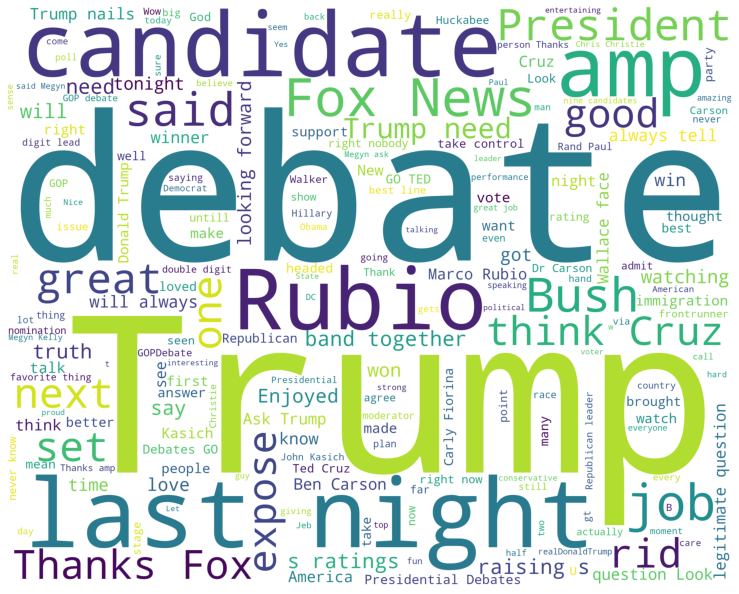

Negative words


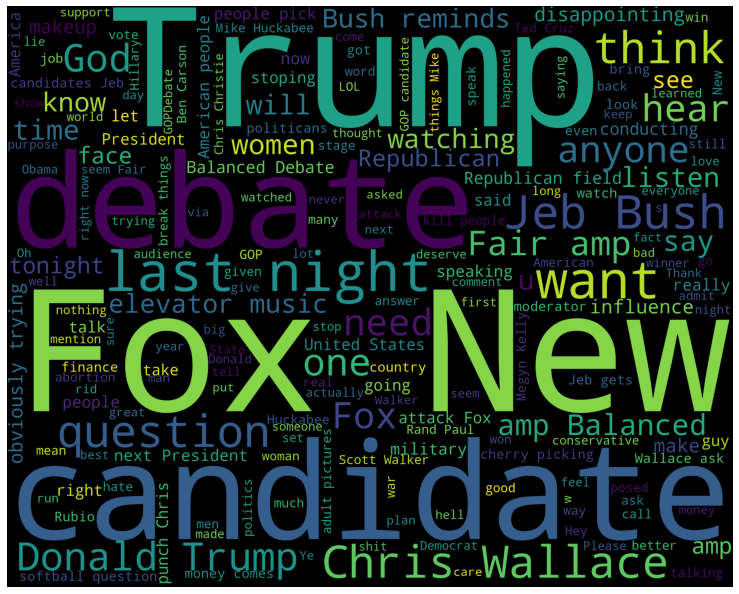

In [20]:

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [21]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [22]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

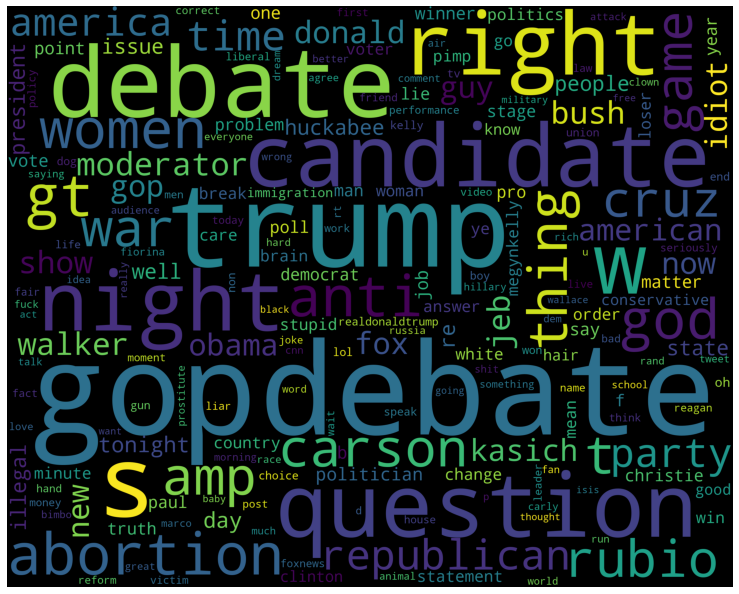

In [23]:
wordcloud_draw(w_features)

In [25]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [68]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    #print(obj)
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    


[Negative]: 857/803 
[Positive]: 219/85 


In [73]:
neg_cnt = 0
pos_cnt = 0
for i in train:
    res =  classifier.classify(extract_features(obj.split()))
    #print(res)
    if(res == 'Positive'): 
        print('hi')
        #neg_cnt = neg_cnt + 1

KeyboardInterrupt: 